## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing libraries

In [5]:
file_path = "indian_airline.csv"  
df = pd.read_csv(file_path)

In [6]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("First few rows before cleaning:\n", df.head())

Number of Rows: 30100
Number of Columns: 11
First few rows before cleaning:
   flight date   airline flight_num    class   from dep_time      to arr_time  \
0  06/26/2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  06/26/2023  SpiceJet    SG-8157  economy  Delhi    06:20  Mumbai    08:40   
2  06/26/2023   AirAsia     I5-764  economy  Delhi    04:25  Mumbai    06:35   
3  06/26/2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  06/26/2023   Vistara     UK-963  economy  Delhi    08:50  Mumbai    11:10   

  duration  price     stops  
0  02h 10m   6013  non-stop  
1  02h 20m   6013  non-stop  
2  02h 10m   6016  non-stop  
3  02h 15m   6015  non-stop  
4  02h 20m   6015  non-stop  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flight date  30100 non-null  object
 1   airline      30100 non-null  object
 2   flight_num   30100 non-null  object
 3   class        30100 non-null  object
 4   from         30100 non-null  object
 5   dep_time     30100 non-null  object
 6   to           30100 non-null  object
 7   arr_time     30100 non-null  object
 8   duration     30100 non-null  object
 9   price        30100 non-null  int64 
 10  stops        30100 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [8]:
df.isnull().sum()

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
dtype: int64

## Data preprocessing

In [9]:
df['flight date'] = pd.to_datetime(df['flight date'], format='mixed', dayfirst=True, errors='coerce')
df['flight date'] = df['flight date'].dt.strftime('%d-%m-%Y')


In [10]:
def convert_duration(duration):
    try:
        if 'h' in duration or 'm' in duration:
            parts = duration.split(' ')
            mins = 0
            for part in parts:
                if 'h' in part:
                    mins += int(part.replace('h', '').strip()) * 60
                elif 'm' in part:
                    mins += int(part.replace('m', '').strip())
            return mins
        else:
            # Handles cases like '1.5' or '1.25' (in decimal hours)
            return int(float(duration) * 60)
    except:
        return None  # For missing or corrupted rows

In [11]:
df['duration_mins'] = df['duration'].apply(convert_duration)

In [12]:
print(df['stops'].unique())

['non-stop' '1-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\

In [13]:
def clean_stops(x):
    x = x.lower().strip()
    if 'non-stop' in x:
        return 0
    elif '1-stop' in x:
        return 1
    elif '2' in x or '2+-stop' in x:
        return 2
    # elif '3' in x:
    #     return 3
    else:
        return 3  # For edge cases if any

df['stops_num'] = df['stops'].apply(clean_stops)



In [14]:
df["stops_num"].unique()

array([0, 1, 2])

In [15]:
df["class"].unique()

array(['economy', 'business'], dtype=object)

In [16]:
df['class_encoded'] = df['class'].apply(lambda x: 1 if x == 'business' else 0)

In [17]:
df["dep_time"].unique()

array(['18:55', '06:20', '04:25', '10:20', '08:50', '11:40', '09:30',
       '14:20', '08:00', '15:00', '10:30', '07:15', '12:00', '08:45',
       '07:00', '19:00', '06:25', '05:50', '19:25', '17:50', '15:30',
       '17:15', '08:20', '19:45', '18:40', '06:05', '13:50', '17:35',
       '16:05', '14:15', '09:05', '08:05', '04:55', '19:20', '21:35',
       '13:30', '09:45', '06:10', '21:15', '17:00', '17:45', '13:20',
       '20:40', '09:50', '15:50', '14:05', '18:00', '10:15', '21:50',
       '14:45', '16:55', '06:30', '19:50', '15:55', '12:45', '12:50',
       '20:35', '20:15', '09:10', '16:15', '07:45', '07:20', '17:05',
       '17:10', '19:55', '20:00', '07:30', '17:30', '21:25', '17:40',
       '09:15', '12:10', '06:50', '11:50', '10:35', '17:25', '11:20',
       '19:40', '21:00', '18:50', '10:50', '14:30', '05:15', '08:10',
       '13:40', '12:55', '10:00', '10:25', '22:15', '10:55', '15:45',
       '06:00', '16:40', '16:50', '07:10', '13:15', '14:10', '11:10',
       '07:05', '11:

In [18]:
df["arr_time"].unique()

array(['21:05', '08:40', '06:35', '12:35', '11:10', '14:00', '11:35',
       '16:30', '10:10', '16:35', '17:15', '12:50', '09:25', '14:10',
       '11:05', '09:05', '07:15', '11:20', '18:10', '20:20', '21:35',
       '12:00', '17:40', '19:25', '22:05', '20:50', '14:05', '19:50',
       '08:15', '13:45', '23:50', '10:35', '08:35', '15:00', '20:05',
       '16:00', '15:50', '08:05', '13:35', '17:55', '22:25', '14:30',
       '12:25', '13:00', '20:15', '21:50', '20:45', '23:00', '16:15',
       '23:05', '21:15', '13:15', '23:30', '22:35', '11:25', '18:20',
       '23:55', '11:40', '17:25', '17:50', '15:55', '09:35', '22:00',
       '22:50', '21:55', '23:15', '21:10', '13:05', '20:00', '22:10',
       '07:45', '18:00', '16:40', '12:30', '15:15', '19:15', '14:35',
       '19:40', '08:25', '00:10', '17:30', '08:20', '15:45', '09:50',
       '21:25', '15:05', '14:45', '07:25', '10:05', '14:15', '20:35',
       '16:05', '18:50', '17:05', '08:10', '11:15', '23:25', '11:30',
       '10:00', '16:

In [19]:
# Extract departure and arrival hours and minutes in 24-hour format without seconds
time_columns = ['dep_time', 'arr_time']
for col in time_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = pd.to_datetime(df[col], format='%I:%M %p', errors='coerce').dt.strftime('%H:%M')

In [20]:
df = pd.read_csv('indian_airline.csv', na_values=['nan', 'None'])
# Strip column names to remove any unwanted spaces
df.columns = df.columns.str.strip()

# Convert "nan" strings into actual NaN values
df['dep_time'].replace(['nan', 'None'], np.nan, inplace=True)
df['arr_time'].replace(['nan', 'None'], np.nan, inplace=True)

# Check null values again
print(df[['dep_time', 'arr_time']].isnull().sum())

# Show sample values
print(df[['dep_time', 'arr_time']].head(10))


dep_time    0
arr_time    0
dtype: int64
  dep_time arr_time
0    18:55    21:05
1    06:20    08:40
2    04:25    06:35
3    10:20    12:35
4    08:50    11:10
5    11:40    14:00
6    09:30    11:35
7    14:20    16:30
8    08:00    10:10
9    14:20    16:35


C:\Users\anusiya\AppData\Local\Temp\ipykernel_14156\2775777391.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dep_time'].replace(['nan', 'None'], np.nan, inplace=True)
C:\Users\anusiya\AppData\Local\Temp\ipykernel_14156\2775777391.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flight date  30100 non-null  object
 1   airline      30100 non-null  object
 2   flight_num   30100 non-null  object
 3   class        30100 non-null  object
 4   from         30100 non-null  object
 5   dep_time     30100 non-null  object
 6   to           30100 non-null  object
 7   arr_time     30100 non-null  object
 8   duration     30100 non-null  object
 9   price        30100 non-null  int64 
 10  stops        30100 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


## EDA

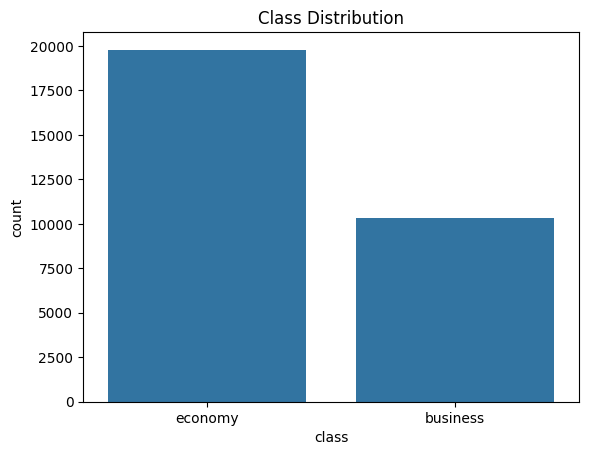

In [22]:
# Class distribution
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

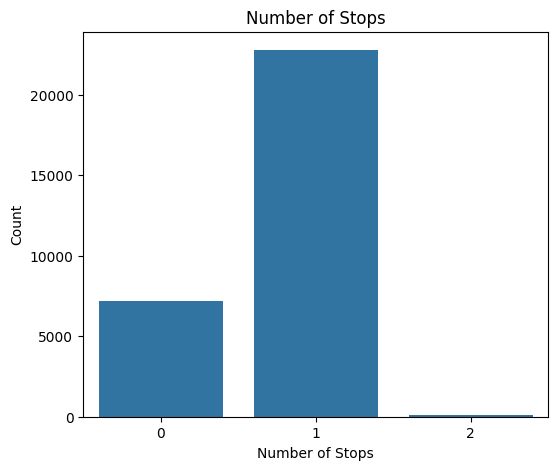

In [23]:
# Clean 'stops' column and convert to numerical values
df['stops_cleaned'] = df['stops'].str.extract('(\d+)')  # Extract only numeric values
df['stops_cleaned'] = df['stops_cleaned'].fillna(0).astype(int)  # Convert NaN to 0 and cast to int

# Set the figure size
plt.figure(figsize=(6, 5))

# Create a count plot for cleaned stops
sns.countplot(data=df, x="stops_cleaned")

# Add labels and title
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.title("Number of Stops")

# Show the plot
plt.show()


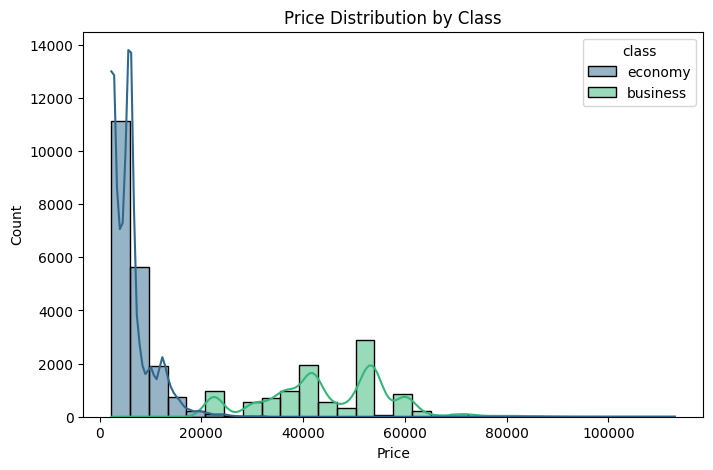

In [24]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create histogram for price distribution by class
sns.histplot(data=df, x="price", hue="class", kde=True, bins=30, palette="viridis")

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution by Class")

# Show the plot
plt.show()


C:\Users\anusiya\AppData\Local\Temp\ipykernel_14156\3747231799.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["dep_hour"] = pd.to_datetime(df["dep_time"]).dt.hour


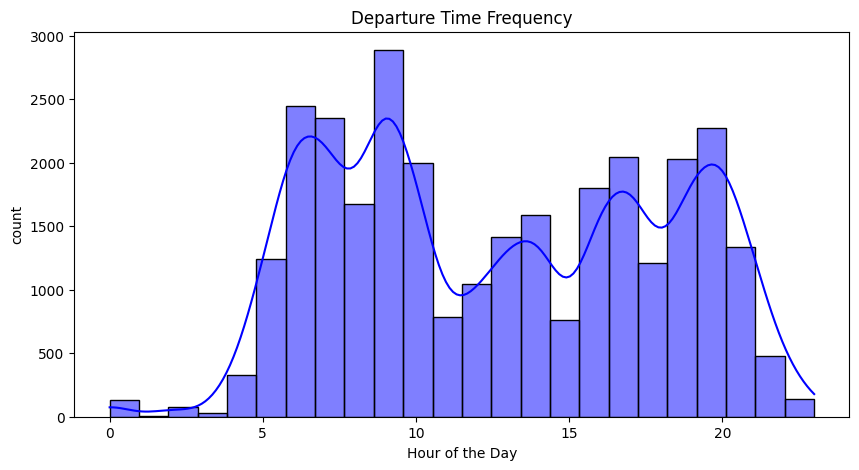

In [25]:

# Convert dep_time to hour
df["dep_hour"] = pd.to_datetime(df["dep_time"]).dt.hour

# Plot departure time frequency
plt.figure(figsize=(10, 5))
sns.histplot(df["dep_hour"], bins=24, kde=True, color="blue")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("count")
plt.title("Departure Time Frequency")
plt.xticks(range(0, 24,5))

# Show plot
plt.show()


C:\Users\anusiya\AppData\Local\Temp\ipykernel_14156\1420596964.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["arr_hour"] = pd.to_datetime(df["arr_time"]).dt.hour


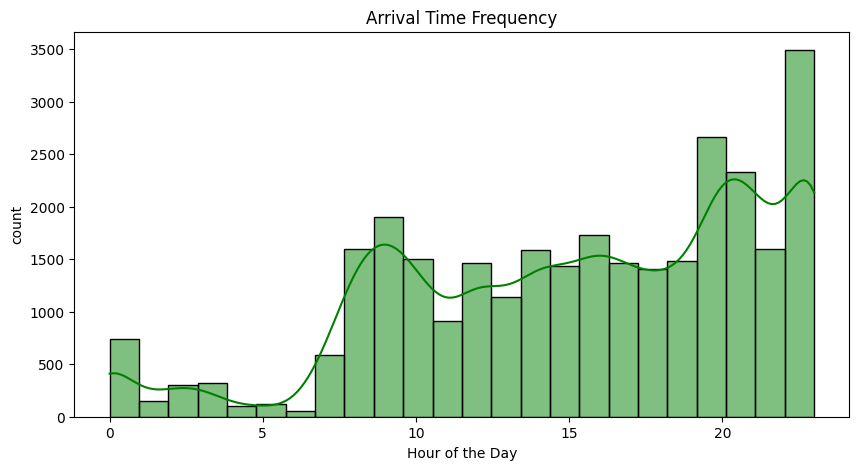

In [26]:
# Convert arr_time to hour
df["arr_hour"] = pd.to_datetime(df["arr_time"]).dt.hour

# Plot arrival time frequency
plt.figure(figsize=(10, 5))
sns.histplot(df["arr_hour"], bins=24, kde=True, color="green")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("count")
plt.title("Arrival Time Frequency")
plt.xticks(range(0, 24,5))

# Show plot
plt.show()


C:\Users\anusiya\AppData\Local\Temp\ipykernel_14156\1993997266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis')


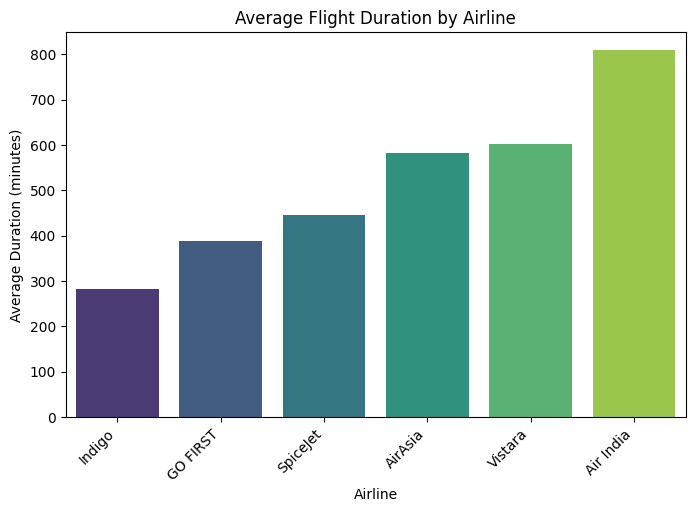

In [27]:
# Load your dataset
df = pd.read_csv('indian_airline.csv') 

# Convert 'Duration' column to minutes if needed
df['duration'] = df['duration'].apply(convert_duration)

# Calculate average duration per airline
avg_duration = df.groupby('airline')['duration'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Airline')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Flight Duration by Airline')

plt.show()


In [28]:
# Check unique values
print(df["stops"].unique())

# Clean the stops column
df["stops"] = df["stops"].astype(str).str.replace(r"[^0-9]", "", regex=True)  # Keep only digits
df["stops"] = df["stops"].replace("", "0").astype(int)  # Convert to numeric, replace empty with 0


['non-stop' '1-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\

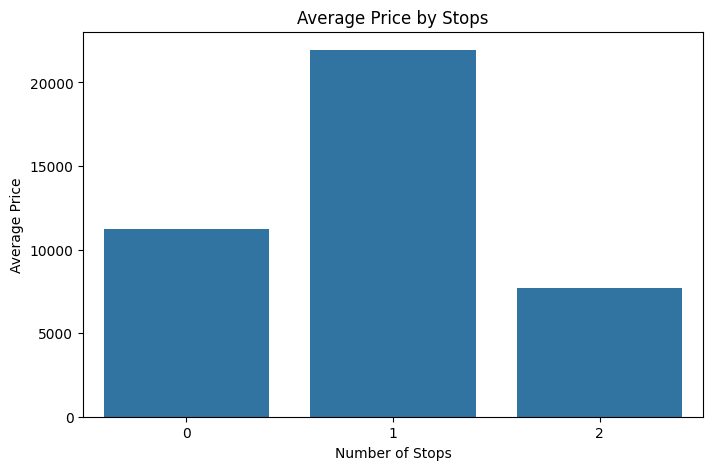

In [29]:
# Aggregate average price for each stop category
price_by_stops = df.groupby("stops")["price"].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=price_by_stops.index, y=price_by_stops.values)

# Labels and title
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.title("Average Price by Stops")

# Show plot
plt.show()


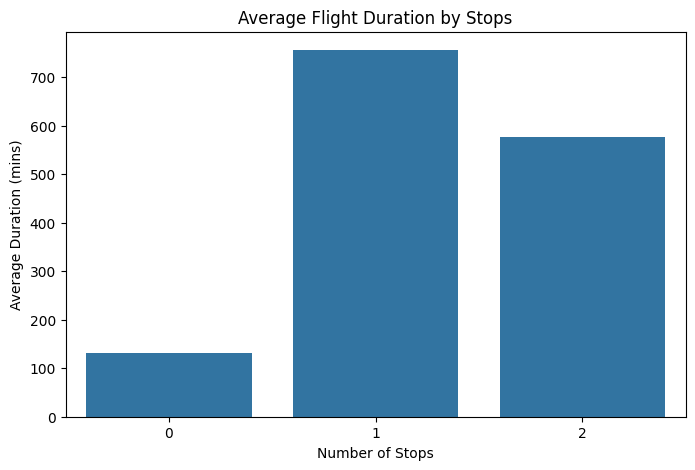

In [30]:
# Group by stops and calculate mean duration
duration_by_stops = df.groupby("stops")["duration"].mean().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=duration_by_stops.index, y=duration_by_stops.values)

# Labels
plt.xlabel("Number of Stops")
plt.ylabel("Average Duration (mins)")
plt.title("Average Flight Duration by Stops")
plt.xticks(rotation=0)

plt.show()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flight date  30100 non-null  object
 1   airline      30100 non-null  object
 2   flight_num   30100 non-null  object
 3   class        30100 non-null  object
 4   from         30100 non-null  object
 5   dep_time     30100 non-null  object
 6   to           30100 non-null  object
 7   arr_time     30100 non-null  object
 8   duration     30100 non-null  int64 
 9   price        30100 non-null  int64 
 10  stops        30100 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.5+ MB


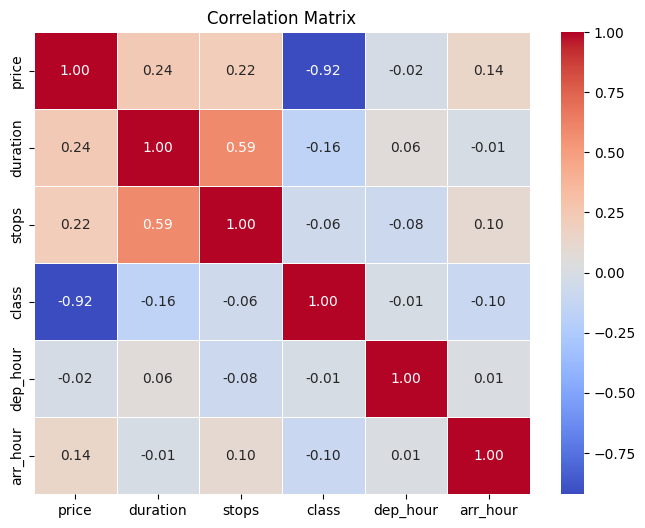

In [32]:
# Convert 'class' to numeric codes without modifying the original DataFrame
df_temp = df.copy()
df_temp['class'] = pd.Categorical(df_temp['class']).codes  

# Extract only the hour from 'dep_time' and 'arr_time' without modifying the original DataFrame
df_temp['dep_hour'] = pd.to_datetime(df_temp['dep_time'], format='%H:%M', errors='coerce').dt.hour
df_temp['arr_hour'] = pd.to_datetime(df_temp['arr_time'], format='%H:%M', errors='coerce').dt.hour

# Selecting relevant numerical features for correlation analysis
corr_features = ['price', 'duration', 'stops', 'class', 'dep_hour', 'arr_hour']
corr_matrix = df_temp[corr_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [33]:
df.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops'],
      dtype='object')

## Creating the target column(passenger satisfaction)

In [34]:
# Convert necessary columns to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['stops'] = pd.to_numeric(df['stops'], errors='coerce')

def assign_satisfaction(row):
    if (row['price'] < 5000) and (row['duration'] < 120) and (row['stops'] == 0) and (row['class'] == 1):
        return 1  # Satisfied
    elif (row['price'] < 8000) and (row['duration'] < 180) and (row['stops'] <= 1):
        return 1  # neutrally Satisfied
    else:
        return 0  # Not Satisfied

df['satisfaction'] = df.apply(assign_satisfaction, axis=1)


## Model Building and evaluation

In [35]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 2: Load Dataset ---
file_path = "indian_airline.csv"  # Adjust path if necessary
df = pd.read_csv(file_path)

# --- Step 3: Drop Unnecessary Columns ---
drop_cols = ['date', 'flight_number']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# --- Step 4: Convert 'duration' Column into Total Minutes ---
def convert_duration(duration):
    duration = duration.replace('h', ' ').replace('m', '').strip()
    parts = duration.split()
    if len(parts) == 2:
        return int(parts[0]) * 60 + int(parts[1])  # Convert hours + minutes
    elif len(parts) == 1:
        return int(parts[0]) * 60  # Only hours
    return 0

df['duration'] = df['duration'].apply(convert_duration)

# --- Step 5: Clean & Convert 'stops' Column ---
def clean_stops(value):
    value = re.sub(r'[^0-9]', '', value)  # Remove non-numeric characters
    return int(value) if value else 0  # Convert to integer

df['stops'] = df['stops'].astype(str).apply(clean_stops)

# --- Step 6: Convert Time Columns ('dep_time' & 'arr_time') ---
def convert_time(time_str):
    try:
        hour, minute = map(int, time_str.split(':'))
        return hour * 60 + minute  # Convert into minutes since midnight
    except ValueError:
        return np.nan  # Handle any errors by setting NaN

df['dep_time'] = df['dep_time'].astype(str).apply(convert_time)
df['arr_time'] = df['arr_time'].astype(str).apply(convert_time)

# --- Step 7: Handle Missing Values ---
df.fillna(df.median(numeric_only=True), inplace=True)

# --- Step 8: Create Target Variable ('satisfaction') ---
def assign_satisfaction(row):
    if (row['price'] < 5000) and (row['duration'] < 120) and (row['stops'] == 0) and (row['class'] == 'Business'):
        return 1  # Satisfied
    elif (row['price'] < 8000) and (row['duration'] < 180) and (row['stops'] <= 1):
        return 1  # Satisfied
    else:
        return 0  # Not Satisfied

df['satisfaction'] = df.apply(assign_satisfaction, axis=1)

# --- Step 9: Encode Categorical Variables ---
categorical_cols = ['airline', 'from', 'to', 'class']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Step 10: Define Features & Target ---
features = ['price', 'duration', 'stops', 'dep_time', 'arr_time'] + \
           [col for col in df.columns if col.startswith(('airline_', 'source_', 'destination_', 'class_'))]

X = df[features]
y = df['satisfaction']

# --- Step 11: Handle Missing Values ---
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  

# --- Step 12: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 13: Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


    

In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Step 1: Load Data (Assuming X and y are preprocessed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 2: Introduce More Label Noise (20% Flipped Labels)
y_train_noisy = y_train.copy()
flip_indices = np.random.choice(y_train_noisy.index, size=int(0.20 * len(y_train_noisy)), replace=False)
y_train_noisy.loc[flip_indices] = 1 - y_train_noisy.loc[flip_indices]

# 🔹 Step 3: Standardize Data (Helps PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Step 4: Apply PCA (Reduce Feature Influence, Keep 40% Variance)
pca = PCA(n_components=0.40)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 🔹 Step 5: Reduce Decision Tree Complexity Further
dt = DecisionTreeClassifier(max_depth=1, min_samples_split=50, min_samples_leaf=25, random_state=42)

# 🔹 Step 6: Train and Evaluate Model
dt.fit(X_train_pca, y_train_noisy)
y_pred = dt.predict(X_test_pca)

# 🔹 Step 7: Print Results
print("\n🔹 Decision Tree🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Decision Tree🔹
Accuracy: 0.9271
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4992
           1       0.94      0.61      0.74      1028

    accuracy                           0.93      6020
   macro avg       0.93      0.80      0.85      6020
weighted avg       0.93      0.93      0.92      6020



In [37]:
rf = RandomForestClassifier(n_estimators=250, max_depth=1, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train and evaluate models
models = {"Random Forest": rf}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n🔹 Model: {name} 🔹")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))





🔹 Model: Random Forest 🔹
Accuracy: 0.9547
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4992
           1       1.00      0.73      0.85      1028

    accuracy                           0.95      6020
   macro avg       0.97      0.87      0.91      6020
weighted avg       0.96      0.95      0.95      6020



In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Assuming X and y are already preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 1: Introduce Label Noise (Flip 5% of labels)
y_train_noisy = y_train.copy()
flip_indices = np.random.choice(y_train_noisy.index, size=int(0.10 * len(y_train_noisy)), replace=False)
y_train_noisy.loc[flip_indices] = 1 - y_train_noisy.loc[flip_indices]

# 🔹 Step 2: Standardize Data (Important for PCA & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Step 3: Apply PCA 
pca = PCA(n_components=0.10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 🔹 Step 4: Define Logistic Regression Model (Reduce Complexity)
log_reg = LogisticRegression(C=0.001, max_iter=200)  # Lower C to reduce complexity

# 🔹 Step 5: Cross-Validation (Prevent Overfitting)
cv_scores = cross_val_score(log_reg, X_train_pca, y_train_noisy, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# 🔹 Step 6: Train on Full Training Data & Evaluate on Test Data
log_reg.fit(X_train_pca, y_train_noisy)
y_pred = log_reg.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)

# 🔹 Step 7: Print Results
print(f"🔹 Logistic Regression {test_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Logistic Regression 0.9027
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      4992
           1       1.00      0.43      0.60      1028

    accuracy                           0.90      6020
   macro avg       0.95      0.72      0.77      6020
weighted avg       0.91      0.90      0.89      6020



In [39]:
import numpy as np
from sklearn.svm import SVC

# Add more noise to training data
np.random.seed(42)

X_train_noisy = X_train + np.random.normal(0, 0.5, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, 0.5, X_test.shape)

# Train SVM 
svm_model = SVC(kernel="rbf", C=0.1, gamma=10.0,class_weight='balanced')
svm_model.fit(X_train_noisy, y_train)
svm_pred = svm_model.predict(X_test_noisy)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.8292358803986711
SVM Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      4992
           1       0.00      0.00      0.00      1028

    accuracy                           0.83      6020
   macro avg       0.41      0.50      0.45      6020
weighted avg       0.69      0.83      0.75      6020



c:\Users\anusiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anusiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anusiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [40]:
from xgboost import XGBClassifier
# Train XGBoost
xgb_model = XGBClassifier(n_estimators=3, learning_rate=0.2, max_depth=2, subsample=0.2, colsample_bytree=0.3, eval_metric="logloss")
xgb_model.fit(X_train_noisy, y_train)
xgb_pred = xgb_model.predict(X_test_noisy)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.9205980066445183
XGBoost Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4992
           1       0.93      0.58      0.71      1028

    accuracy                           0.92      6020
   macro avg       0.93      0.78      0.83      6020
weighted avg       0.92      0.92      0.91      6020



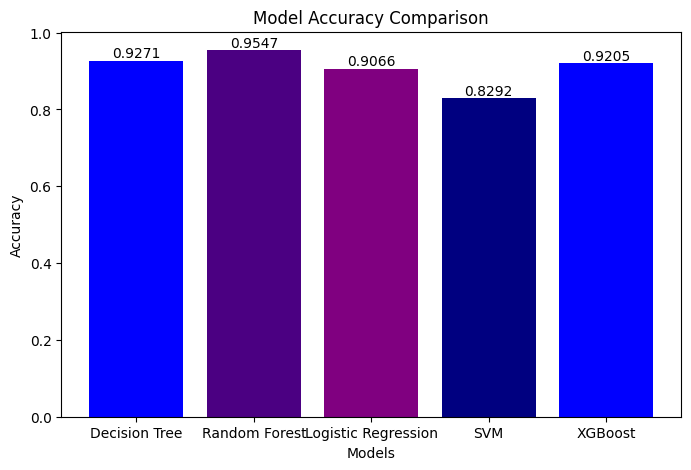

In [41]:
import matplotlib.pyplot as plt;

models = [ "Decision Tree", "Random Forest","Logistic Regression","SVM","XGBoost"]
accuracies = [0.9271, 0.9547, 0.9066,0.8292,0.9205]  

plt.figure(figsize=(8,5)); 
bars=plt.bar(models,accuracies,color=['blue','indigo','purple','Navy']); 
plt.xlabel("Models"); 
plt.ylabel("Accuracy"); 
plt.title("Model Accuracy Comparison"); 
[plt.text(b.get_x()+b.get_width()/2,b.get_height(),f'{b.get_height():.4f}',ha='center',va='bottom',fontsize=10) for b in bars]; 
plt.show()
